In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import random
import matplotlib.pyplot as plt

In [19]:
X_train = np.loadtxt('data/input.csv', delimiter=',')
y_train = np.loadtxt('data/labels.csv', delimiter=',')

X_test = np.loadtxt('data/input.csv', delimiter=',')
y_test = np.loadtxt('data/labels.csv', delimiter=',')

In [20]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_test: ", y_test.shape)

shape of X_train:  (2000, 100, 100, 3)
shape of Y_train:  (2000, 1)
shape of X_test:  (2000, 100, 100, 3)
shape of y_test:  (2000, 1)


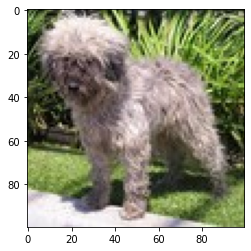

In [22]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [23]:
# MODEL

In [28]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
    
])

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9083 - loss: 0.2346
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9198 - loss: 0.2054
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9432 - loss: 0.1710
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9519 - loss: 0.1504
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9477 - loss: 0.1457


In [34]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9662 - loss: 0.1164


[0.11188191175460815, 0.968999981880188]

MAKING PREDICTIONS  


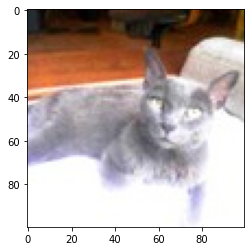

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.81431687]]
cat


In [50]:
idx2 = random.randint(0, len(y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)
y_pred = y_pred > 0.5

if (y_pred == 0):
    print("dog")
else:
    print("cat")

array([[0.00016469]], dtype=float32)